# Célula 1 — Título, autores e link do dataset

O que faz:
- Informa o tema do notebook, autores e o link para o dataset utilizado.

Observação: célula explicativa; não contém lógica executável além de texto.

\# Conjuntos de Dados de Monitoramento de Estresse de Estudantes <br>
Feito por: Gabriel Maia Miguel, Fernanda Martins da Silva<br>
-----------BV3035522------------BV3032345----------------<br>
Dataset: https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets

# Célula 2 — Carregamento e concatenação dos datasets

O que faz:
- Lê dois CSVs (`Stress_Dataset.csv` e `StressLevelDataset.csv`) e concatena colunas em um único DataFrame `df`.
- Exibe o DataFrame resultante (útil para inspeção inicial).

Observação: verifique o caminho `dataset/` existente no repositório; `pd.concat(axis=1)` assume alinhamento por índice.

In [49]:
import pandas as pd
dfStress = pd.read_csv('dataset/Stress_Dataset.csv')
dfLevel = pd.read_csv('dataset/StressLevelDataset.csv')

df = pd.concat([dfStress, dfLevel], axis=1)
df

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,0.0,20.0,3.0,4.0,2.0,5.0,1.0,2.0,1.0,2.0,...,2,3,2,3,3,2,3,3,2,1
1,0.0,20.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,4.0,...,2,1,4,1,5,1,4,5,5,2
2,0.0,20.0,5.0,4.0,2.0,2.0,1.0,3.0,4.0,2.0,...,2,2,3,3,2,2,3,2,2,1
3,1.0,20.0,3.0,4.0,3.0,2.0,2.0,3.0,4.0,3.0,...,2,2,4,1,4,1,4,4,5,2
4,0.0,20.0,3.0,3.0,3.0,2.0,2.0,4.0,4.0,4.0,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,2,2,2,3,3,2,3,3,1
1096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,0,1,1,1,1,3,4,3,2
1097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,5,1,4,1,3,1,2,1,0
1098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2,5,1,4,1,4,4,4,2


# Célula 3 — Criação de coluna categórica `Gender_Type`

O que faz:
- Mapeia valores numéricos de `Gender` para rótulos 'H' (homem) e 'M' (mulher) em nova coluna `Gender_Type`.
- Exibe as primeiras linhas para verificar a transformação.

Observação: útil para análises e agrupamentos por gênero legíveis.

In [50]:
# Cria coluna Gender_Type: 0 -> H, 1 -> M
df['Gender_Type'] = df['Gender'].map({0: 'H', 1: 'M'})
df[['Gender', 'Gender_Type']].head()

,Gender,Gender_Type
0,0.0,H
1,0.0,H
2,0.0,H
3,1.0,M
4,0.0,H


# Célula 4 — Verificação de valores ausentes

O que faz:
- Verifica coluna a coluna se existem valores `NaN` no DataFrame com `df.isnull().any()`.

Observação: passo rápido para detectar necessidade de limpeza adicional.

In [51]:
df.isnull().any()

Gender                                                                   True
Age                                                                      True
Have you recently experienced stress in your life?                       True
Have you noticed a rapid heartbeat or palpitations?                      True
Have you been dealing with anxiety or tension recently?                  True
Do you face any sleep problems or difficulties falling asleep?           True
Have you been dealing with anxiety or tension recently?.1                True
Have you been getting headaches more often than usual?                   True
Do you get irritated easily?                                             True
Do you have trouble concentrating on your academic tasks?                True
Have you been feeling sadness or low mood?                               True
Have you been experiencing any illness or health issues?                 True
Do you often feel lonely or isolated?                           

# Célula 5 — Linhas com qualquer NaN

O que faz:
- Seleciona todas as linhas que têm pelo menos uma coluna `NaN` usando `df.isnull().any(axis=1)` e exibe essas linhas.

Observação: ajuda a decidir estratégias (drop, imputação) e ver o impacto na amostra.

In [52]:
rows_with_nan = df[df.isnull().any(axis=1)]
rows_with_nan

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,Gender_Type
843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,2,5,1,3,1,2,1,0,NaN
844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,5,1,4,1,5,4,5,2,NaN
845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,4,2,4,1,4,5,4,2,NaN
846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,2,4,1,3,2,1,1,0,NaN
847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,5,2,5,1,5,5,4,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,3,3,2,3,3,1,NaN
1096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,1,1,1,3,4,3,2,NaN
1097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,1,4,1,3,1,2,1,0,NaN
1098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,5,1,4,1,4,4,4,2,NaN


# Célula 6 — Remoção de linhas com NaN

O que faz:
- Remove todas as linhas que contêm `NaN` com `df.dropna()` e re-verifica se ainda existem valores ausentes.

Observação: `dropna()` reduz o tamanho da amostra; atenção ao viés introduzido.

In [53]:
df = df.dropna()
df.isnull().any()

Gender                                                                  False
Age                                                                     False
Have you recently experienced stress in your life?                      False
Have you noticed a rapid heartbeat or palpitations?                     False
Have you been dealing with anxiety or tension recently?                 False
Do you face any sleep problems or difficulties falling asleep?          False
Have you been dealing with anxiety or tension recently?.1               False
Have you been getting headaches more often than usual?                  False
Do you get irritated easily?                                            False
Do you have trouble concentrating on your academic tasks?               False
Have you been feeling sadness or low mood?                              False
Have you been experiencing any illness or health issues?                False
Do you often feel lonely or isolated?                           

# Célula 7 — Informações gerais do DataFrame

O que faz:
- Mostra `df.info()` para visualizar tipos, contagem de entradas por coluna e uso de memória.

Observação: útil para confirmar tipos e tamanhos após limpeza.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 843 entries, 0 to 842
Data columns (total 48 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Gender                                                                843 non-null    float64
 1   Age                                                                   843 non-null    float64
 2   Have you recently experienced stress in your life?                    843 non-null    float64
 3   Have you noticed a rapid heartbeat or palpitations?                   843 non-null    float64
 4   Have you been dealing with anxiety or tension recently?               843 non-null    float64
 5   Do you face any sleep problems or difficulties falling asleep?        843 non-null    float64
 6   Have you been dealing with anxiety or tension recently?.1             843 non-null    float64
 7   Have

# Célula 8 — Contagem por `Gender`

O que faz:
- Mostra `value_counts()` para a coluna `Gender`, indicando a distribuição de gênero na amostra.

Observação: útil para identificar desbalanceamento entre classes.

In [55]:
df["Gender"].value_counts()


Gender
0.0    548
1.0    295
Name: count, dtype: int64

# Célula 9 — Contagem por `Age`

O que faz:
- Mostra `value_counts()` para a coluna `Age`, útil para ver distribuição etária dos respondentes.

Observação: dependendo do número de idades distintas, pode ser útil agrupar faixas etárias.

In [56]:
df["Age"].value_counts()


Age
19.0     284
20.0     234
21.0     122
18.0     110
17.0      28
22.0      27
28.0       6
24.0       6
15.0       6
36.0       4
14.0       4
32.0       3
41.0       3
37.0       3
100.0      3
Name: count, dtype: int64

# Célula 10 — Contagem por `bullying`

O que faz:
- Exibe `value_counts()` para a coluna `bullying`, mostrando distribuição de respostas relacionadas a bullying.

Observação: ajuda a visualizar prevalência de bullying na amostra.

In [57]:
df["bullying"].value_counts()


bullying
1    256
3    156
4    138
5    131
2    130
0     32
Name: count, dtype: int64

# Célula 11 — Contagem por `stress_level`

O que faz:
- Mostra `value_counts()` para a coluna `stress_level`, indicando níveis de estresse reportados.

Observação: essa informação é central para as perguntas de análise do grupo.

In [58]:
df["stress_level"].value_counts()


stress_level
0    288
1    284
2    271
Name: count, dtype: int64

# Célula 12 — Estatísticas descritivas gerais

O que faz:
- Exibe `df.describe()` para obter estatísticas resumo (count, mean, std, min, quartis, max) das colunas numéricas.

Observação: útil para inspeção rápida de medidas resumo.

In [59]:
df.describe()


,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,...,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000
mean,0.349941,20.071174,2.997628,2.755635,2.543298,2.786477,2.663108,2.628707,2.702254,2.699881,...,2.780546,2.793594,2.619217,2.658363,2.642942,1.907473,2.705813,2.763938,2.599051,0.979834
std,0.477234,5.429502,1.134639,1.118650,1.201330,1.266959,1.266376,1.266593,1.314213,1.313673,...,1.449220,1.395652,1.310821,1.380905,1.524747,1.046872,1.429683,1.413383,1.529007,0.814548
min,0.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,0.000000,19.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000
75%,1.000000,20.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,1.000000,100.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


# Célula 13 — Estatísticas descritivas selecionadas

O que faz:
- Mostra `describe()` apenas para as colunas `Gender`, `Age`, `bullying`, `stress_level` para focar nas variáveis de interesse.

Observação: útil quando o DataFrame contém muitas colunas e queremos um resumo das principais.

In [60]:
df[["Gender", "Age", "bullying", "stress_level"]].describe()


,Gender,Age,bullying,stress_level
count,843.000000,843.000000,843.000000,843.000000
mean,0.349941,20.071174,2.599051,0.979834
std,0.477234,5.429502,1.529007,0.814548
min,0.000000,14.000000,0.000000,0.000000
25%,0.000000,19.000000,1.000000,0.000000
50%,0.000000,19.000000,3.000000,1.000000
75%,1.000000,20.000000,4.000000,2.000000
max,1.000000,100.000000,5.000000,2.000000


# Célula 14 — Histogramas das variáveis-chave

O que faz:
- Gera histogramas para `Gender`, `Age`, `bullying`, `stress_level` para visualizar distribuições básicas.

Observação: para `Gender` (categórica) o histograma mostra contagens; para `Age` muitas categorias podem gerar gráfico poluído.

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'bullying'}>,
        <Axes: title={'center': 'stress_level'}>]], dtype=object)

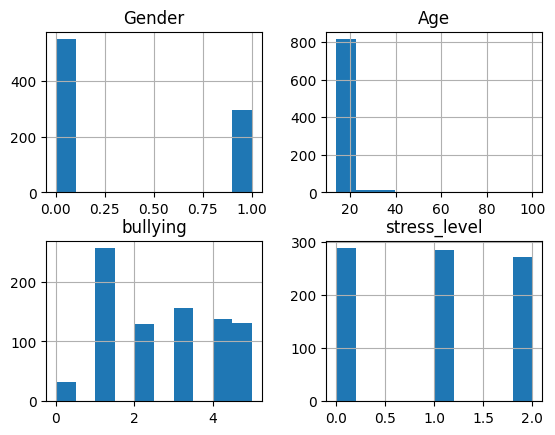

In [61]:
df[["Gender", "Age", "bullying", "stress_level"]].hist(bins=10)

# Célula 15 — Médias e desvios padrão

O que faz:
- Calcula e imprime média e desvio padrão para `bullying`, `stress_level` e `Age`.

Observação: medidas de dispersão ajudam a entender variabilidade dos dados.

In [62]:
print(df["bullying"].mean(), "+/-", df["bullying"].std())
print(df["stress_level"].mean(), "+/-", df["stress_level"].std())
print(df["Age"].mean(), "+/-", df["Age"].std())

2.5990510083036775 +/- 1.5290066484892337
0.9798339264531435 +/- 0.814547931942591
20.0711743772242 +/- 5.42950170473479


# Célula 16 — Detecção simples de outliers em `bullying`

O que faz:
- Itera sobre linhas e marca como outlier qualquer valor de `bullying` maior que mean + 2*std.
- Imprime número e proporção de outliers detectados.

Observação: abordagem simples; métodos como IQR ou z-score também são recomendados.

In [63]:
outliers = []
for index, row in df.iterrows():
    if row["bullying"] > df["bullying"].mean() + 2 * df["bullying"].std():
        outliers.append(index)
print("Número de outliers no dataset:", len(outliers))
print(
    "Proporção de ´outliers´:", len(outliers) / len(df)
)


Número de outliers no dataset: 0
Proporção de ´outliers´: 0.0


# Célula 17 — Correlação (Pearson) entre `bullying` e `stress_level`

O que faz:
- Calcula correlação de Pearson entre `bullying` e `stress_level` para avaliar associação linear.

Observação: Pearson assume relação linear; complementar com Spearman quando a relação for monotônica não linear.

In [64]:
df[["bullying", "stress_level"]].corr("pearson")


,bullying,stress_level
bullying,1.000000,0.744929
stress_level,0.744929,1.000000


# Célula 18 — Correlação (Spearman) entre `bullying` e `stress_level`

O que faz:
- Calcula correlação de Spearman (rho) que mede associação monotônica entre as variáveis.

Observação: útil quando relações não são lineares ou quando há outliers.

In [65]:
df[["bullying", "stress_level"]].corr("spearman")


,bullying,stress_level
bullying,1.000000,0.754383
stress_level,0.754383,1.000000


# Célula 19 — Correlação Age vs stress_level (Pearson)

O que faz:
- Calcula correlação de Pearson entre `Age` e `stress_level` para verificar relação linear entre idade e estresse.

Observação: se `Age` for discreta com muitas categorias, considerar agrupar.

In [66]:
df[["Age", "stress_level"]].corr("pearson")

,Age,stress_level
Age,1.000000,0.000862
stress_level,0.000862,1.000000


# Célula 20 — Correlação Gender vs stress_level (Pearson)

O que faz:
- Calcula correlação de Pearson entre `Gender` e `stress_level` (pode não ser ideal para variável categórica).

Observação: para `Gender` (categórica) preferir análise por agrupamento (`groupby('Gender').mean()`) em vez de correlação simples.

In [67]:
df[["Gender", "stress_level"]].corr("pearson")


,Gender,stress_level
Gender,1.000000,-0.000156
stress_level,-0.000156,1.000000


# Célula 21 — Pergunta 1: gênero com maior estresse médio

O que faz:
- Agrupa por `Gender` e calcula média de `stress_level`, exibindo o gênero com maior média.

Observação: resultado direto e interpretável; útil para responder questões do trabalho.

In [68]:
# 1. Qual gênero sofre de mais estresse?
df_gender_stress = df.groupby('Gender')["stress_level"].mean()
display(df_gender_stress)
max_stress_gender = df_gender_stress.idxmax()
print(f'O gênero que sofre mais estresse é: {max_stress_gender}')

Gender
0.0    0.979927
1.0    0.979661
Name: stress_level, dtype: float64

O gênero que sofre mais estresse é: 0.0


# Célula 22 — Relações por `Gender_Type` (H/M)

O que faz:
- Agrupa por `Gender_Type` e calcula média de `stress_level` e `bullying`, mostrando qual gênero (H/M) tem maiores médias.

Observação: `Gender_Type` é uma forma legível para relatórios e plots.

In [ ]:
# Relações usando Gender_Type (H/M)
df_gender_type_stress = df.groupby('Gender_Type')["stress_level"].mean()
display(df_gender_type_stress)
max_stress_gender_type = df_gender_type_stress.idxmax()
print(f'O gênero (Gender_Type) que sofre mais estresse é: {max_stress_gender_type}')

df_gender_type_bullying = df.groupby('Gender_Type')["bullying"].mean()
display(df_gender_type_bullying)
max_bullying_gender_type = df_gender_type_bullying.idxmax()
print(f'O gênero (Gender_Type) que sofre mais bullying é: {max_bullying_gender_type}')


Gender_Type
H    0.979927
M    0.979661
Name: stress_level, dtype: float64

O gênero (Gender_Type) que sofre mais estresse é: H


Gender_Type
H    2.60219
M    2.59322
Name: bullying, dtype: float64

O gênero (Gender_Type) que sofre mais bullying é: H


# Célula 23 — Pergunta 2: gênero com maior bullying médio

O que faz:
- Agrupa por `Gender` e calcula média de `bullying`, exibindo o gênero com maior média.

Observação: resposta direta para a pergunta guionada no trabalho.

In [70]:
# 2. Qual gênero sofre mais bullying?
df_gender_bullying = df.groupby('Gender')["bullying"].mean()
display(df_gender_bullying)
max_bullying_gender = df_gender_bullying.idxmax()
print(f'O gênero que sofre mais bullying é: {max_bullying_gender}')

Gender
0.0    2.60219
1.0    2.59322
Name: bullying, dtype: float64

O gênero que sofre mais bullying é: 0.0


# Célula 24 — Pergunta 3: idade com maior bullying médio

O que faz:
- Agrupa por `Age` e calcula média de `bullying`, exibindo a idade com maior média.

Observação: se `Age` for granular, agrupar em faixas pode dar resultados mais robustos.

In [71]:
# 3. Qual idade sofre mais bullying?
df_age_bullying = df.groupby('Age')["bullying"].mean()
display(df_age_bullying)
max_bullying_age = df_age_bullying.idxmax()
print(f'A idade que sofre mais bullying é: {max_bullying_age}')

Age
14.0     2.250000
15.0     2.666667
17.0     2.178571
18.0     2.400000
19.0     2.630282
20.0     2.743590
21.0     2.508197
22.0     2.851852
24.0     2.666667
28.0     2.500000
32.0     2.666667
36.0     3.000000
37.0     0.666667
41.0     2.333333
100.0    3.000000
Name: bullying, dtype: float64

A idade que sofre mais bullying é: 36.0


# Célula 25 — Pergunta 4: idade com maior estresse médio

O que faz:
- Agrupa por `Age` e calcula média de `stress_level`, exibindo a idade com maior média.

Observação: considerar agrupamento por faixa etária se houver muitas idades distintas.

In [72]:
# 4. Qual idade sofre mais estresse?
df_age_stress = df.groupby('Age')["stress_level"].mean()
display(df_age_stress)
max_stress_age = df_age_stress.idxmax()
print(f'A idade que sofre mais estresse é: {max_stress_age}')

Age
14.0     1.000000
15.0     1.166667
17.0     1.000000
18.0     0.936364
19.0     0.947183
20.0     1.055556
21.0     0.860656
22.0     1.259259
24.0     1.166667
28.0     1.333333
32.0     1.000000
36.0     1.250000
37.0     0.333333
41.0     0.666667
100.0    1.000000
Name: stress_level, dtype: float64

A idade que sofre mais estresse é: 28.0


# Célula 26 — Correlação entre `Age`, `bullying` e `stress_level`

O que faz:
- Calcula matriz de correlação entre `Age`, `bullying` e `stress_level` e exibe os resultados.

Observação: fornece uma visão geral das associações lineares entre essas variáveis.

In [73]:
# 5. Correlação entre idade, bullying e estresse
correlation = df[["Age", "bullying", "stress_level"]].corr()
display(correlation)
print('Correlação entre idade, bullying e estresse:')
print(correlation)

,Age,bullying,stress_level
Age,1.000000,0.012168,0.000862
bullying,0.012168,1.000000,0.744929
stress_level,0.000862,0.744929,1.000000


Correlação entre idade, bullying e estresse:
                   Age  bullying  stress_level
Age           1.000000  0.012168      0.000862
bullying      0.012168  1.000000      0.744929
stress_level  0.000862  0.744929      1.000000
